In [8]:
###############
### Imports ###
###############

import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

In [9]:
def generate_square_size(length,height,size):
    length = length
    height = height
    while height > length or length%2 == 0:
        length = np.random.randint(1,size)
        height = np.random.randint(1,size/2)
    return length, height

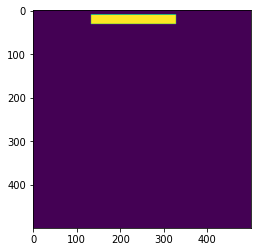

In [10]:
def generate_square(size):
    shape = np.zeros((size,size))
    length, height = generate_square_size(0,1,size)
    start_point = np.random.randint(1,size,(1,2))
    lengthsize = start_point[0,0] + length
    heightsize = start_point[0,1] + height
    while lengthsize > size or heightsize > size or length*height < size**2/100:
        length, height = generate_square_size(0,1,size)
        start_point = np.random.randint(1,size,(1,2))
        lengthsize = start_point[0,0] + length
        heightsize = start_point[0,1] + height
    lengthside = range(start_point[0,0], lengthsize)
    heightside = range(start_point[0,1], heightsize)
    for h in heightside:
        for l in lengthside:
            shape[h,l] = 1
    return shape, length, height, start_point

plt.imshow(generate_square(500)[0])

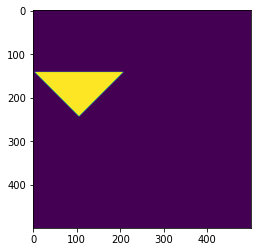

In [11]:
def generate_triangle(size):
    shape = np.zeros((size,size))
    start_point = np.random.randint(1,size,(1,2))
    base = np.random.randint(1,size)
    height = (1-base)/-2
    lengthsize = start_point[0,0] + base
    heightsize = start_point[0,1] + int(height)+1
    while base%2 == 0 or lengthsize > size or heightsize > size or base*height/2 < size**2/100:
        start_point = np.random.randint(1,size,(1,2))
        base = 2*np.random.randint(1,size/2)-1
        height = (1-base)/-2
        lengthsize = start_point[0,0] + base
        heightsize = start_point[0,1] + int(height)+1
    lengthside = range(start_point[0,0], lengthsize)
    heightside = range(start_point[0,1], heightsize)
    for h in heightside:
        for l in lengthside:
            shape[h,l] = 1
        lengthside = lengthside[1:-1]
    return shape, base, height, start_point

plt.imshow(generate_triangle(500)[0])

In [12]:
amount = 100000
size = 20
weights = np.zeros((size,size))
squares = []
triangles = []
for i in range(amount):
    squares.append((generate_square(size)[0],0))
    triangles.append((generate_triangle(size)[0],1))
training = squares + triangles
random.shuffle(training)

In [13]:
while training:
    i = np.random.randint(0,len(training)-1)
    shape = training[i][0]
    target = training[i][1]
    label = np.dot(np.reshape(shape,size**2),np.reshape(weights,size**2))
    if target == label:
        del training[i]
    elif label == 0 and target != label:
        weights += shape
    elif label != 0 and target != label:
        weights -= shape
    clear_output(wait=True)
    plt.imshow(weights)
    plt.title(f'{len(training),i}')
    plt.colorbar()
    plt.show()

    #output node eeds a bias


KeyboardInterrupt: 